# Installation

In [ ]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret

In [ ]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [1]:
from pycaret.utils import version
version()

1.0.0


# 1. Importing Dataset

In [2]:
from pycaret.datasets import get_data #grab data from the pycaret base
data = get_data('juice')

#notice that our target variable is a string - this is automated by pycaret
#the goal of this dataset is to predict the purchase (2 types of juice - CH and MM)

Id Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0   1       CH             237        1     1.75     1.99    0.00     0.0   
1   2       CH             239        1     1.75     1.99    0.00     0.3   
2   3       CH             245        1     1.86     2.09    0.17     0.0   
3   4       MM             227        1     1.69     1.69    0.00     0.0   
4   5       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

# 2. Setting up Environment

In [7]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=786)

#to reproduce EXACT results, must pass a session_id (can use any number - this is the identity)
#again, pycaret just needs the target to be specified (regardless of data type)
#covers nearly all pre-processing functions (e.g., can see train and test sets, automatically imputes missing values, etc.)

 
Setup Succesfully Completed!


# 3. Compare Models

In [8]:
compare_models() #fits all the models on a 10-fold cross validation

#this gives a solid starting point - we know that logistic regression, linear discriminant, and ridge classifier are our top 3 options

# 4. Create Model

In [9]:
lr = create_model('lr')

#notice that mean results match exactly above

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8400  0.9041  0.6667  0.9091  0.7692  0.6512
1       0.7867  0.8837  0.6667  0.7692  0.7143  0.5455
2       0.8533  0.9153  0.7586  0.8462  0.8000  0.6848
3       0.8800  0.9453  0.8276  0.8571  0.8421  0.7454
4       0.7867  0.8726  0.7241  0.7241  0.7241  0.5502
5       0.8800  0.9145  0.9310  0.7941  0.8571  0.7548
6       0.8533  0.9160  0.7586  0.8462  0.8000  0.6848
7       0.7867  0.8426  0.6897  0.7407  0.7143  0.5444
8       0.8108  0.9034  0.6207  0.8571  0.7200  0.5826
9       0.8378  0.8989  0.7586  0.8148  0.7857  0.6555
Mean    0.8315  0.8996  0.7402  0.8159  0.7727  0.6399
SD      0.0350  0.0266  0.0854  0.0554  0.0506  0.0762

In [10]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7333  0.7222  0.6667  0.6667  0.6667  0.4444
1       0.7733  0.7696  0.6667  0.7407  0.7018  0.5198
2       0.7600  0.7789  0.7931  0.6571  0.7188  0.5126
3       0.8400  0.8504  0.8966  0.7429  0.8125  0.6751
4       0.7067  0.7339  0.7931  0.5897  0.6765  0.4186
5       0.7867  0.7924  0.8276  0.6857  0.7500  0.5668
6       0.6000  0.5960  0.5172  0.4839  0.5000  0.1673
7       0.6933  0.6863  0.6552  0.5938  0.6230  0.3656
8       0.7838  0.7609  0.6552  0.7600  0.7037  0.5350
9       0.7568  0.7448  0.6897  0.6897  0.6897  0.4897
Mean    0.7434  0.7435  0.7161  0.6610  0.6842  0.4695
SD      0.0622  0.0645  0.1046  0.0808  0.0779  0.1289

# 5. Tune Model

In [11]:
tuned_dt = tune_model('dt')

#we can see that tuning the decision tree model leads to a 12% increase in AUC

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8667  0.8815  0.7667  0.8846  0.8214  0.7159
1       0.7600  0.8681  0.6333  0.7308  0.6786  0.4886
2       0.8667  0.9104  0.8621  0.8065  0.8333  0.7224
3       0.8533  0.9423  0.8966  0.7647  0.8254  0.7003
4       0.6933  0.7984  0.6552  0.5938  0.6230  0.3656
5       0.8800  0.9044  0.8966  0.8125  0.8525  0.7517
6       0.8000  0.8328  0.6552  0.7917  0.7170  0.5645
7       0.7067  0.7807  0.7241  0.6000  0.6562  0.4043
8       0.7568  0.8605  0.5172  0.7895  0.6250  0.4563
9       0.8108  0.8582  0.8621  0.7143  0.7813  0.6171
Mean    0.7994  0.8637  0.7469  0.7488  0.7414  0.5787
SD      0.0647  0.0474  0.1244  0.0879  0.0867  0.1359

In [12]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')


In [13]:
tuned_nb = tune_model('nb', optimize = 'AUC') #if you want to optimize a certain metric

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7600  0.8522  0.4000  1.0000  0.5714  0.4444
1       0.7067  0.7837  0.6000  0.6429  0.6207  0.3820
2       0.8000  0.9010  0.5862  0.8500  0.6939  0.5527
3       0.8267  0.9363  0.6552  0.8636  0.7451  0.6175
4       0.7467  0.7834  0.6207  0.6923  0.6545  0.4555
5       0.7867  0.8666  0.6552  0.7600  0.7037  0.5385
6       0.7867  0.8831  0.6552  0.7600  0.7037  0.5385
7       0.7333  0.8096  0.4828  0.7368  0.5833  0.3995
8       0.7568  0.8467  0.4483  0.8667  0.5909  0.4417
9       0.7973  0.8567  0.5862  0.8500  0.6939  0.5499
Mean    0.7701  0.8519  0.5690  0.8022  0.6561  0.4920
SD      0.0340  0.0468  0.0878  0.0985  0.0577  0.0734

In [14]:
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=0.001)


# 6. Ensemble Model

In [15]:
bagged_dt = ensemble_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8000  0.8593  0.7000  0.7778  0.7368  0.5763
1       0.7733  0.8811  0.6000  0.7826  0.6792  0.5087
2       0.7867  0.8917  0.6552  0.7600  0.7037  0.5385
3       0.8400  0.9003  0.8276  0.7742  0.8000  0.6669
4       0.6933  0.7792  0.6207  0.6000  0.6102  0.3575
5       0.8400  0.8864  0.8621  0.7576  0.8065  0.6711
6       0.7067  0.7837  0.6207  0.6207  0.6207  0.3816
7       0.7200  0.8010  0.6207  0.6429  0.6316  0.4059
8       0.8243  0.8996  0.7241  0.8077  0.7636  0.6245
9       0.7432  0.8716  0.6207  0.6923  0.6545  0.4512
Mean    0.7728  0.8554  0.6852  0.7216  0.7007  0.5182
SD      0.0519  0.0459  0.0884  0.0720  0.0695  0.1106

In [16]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7867  0.8759  0.7000  0.7500  0.7241  0.5506
1       0.8133  0.8333  0.7667  0.7667  0.7667  0.6111
2       0.8267  0.8677  0.7931  0.7667  0.7797  0.6369
3       0.8533  0.9157  0.8621  0.7812  0.8197  0.6966
4       0.7200  0.7845  0.7586  0.6111  0.6769  0.4349
5       0.8133  0.8681  0.8276  0.7273  0.7742  0.6162
6       0.6267  0.7534  0.5517  0.5161  0.5333  0.2228
7       0.6933  0.7545  0.6552  0.5938  0.6230  0.3656
8       0.8514  0.9080  0.7241  0.8750  0.7925  0.6783
9       0.7162  0.7946  0.6207  0.6429  0.6316  0.4009
Mean    0.7701  0.8356  0.7260  0.7031  0.7122  0.5214
SD      0.0725  0.0574  0.0912  0.1027  0.0879  0.1490

# 7. Blend Models

In [17]:
lr = create_model('lr', verbose=False)
lda = create_model('lda', verbose=False)
gbc = create_model('gbc', verbose=False)

In [18]:
blender = blend_models(estimator_list=[lr,lda,gbc], method = 'soft')

#blender uses these models to predict the outcome and then take average of them

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8267  0.9122  0.6333  0.9048  0.7451  0.6199
1       0.8000  0.9081  0.7000  0.7778  0.7368  0.5763
2       0.8533  0.9295  0.7586  0.8462  0.8000  0.6848
3       0.8933  0.9633  0.8966  0.8387  0.8667  0.7779
4       0.7600  0.8628  0.7586  0.6667  0.7097  0.5066
5       0.8800  0.9183  0.9310  0.7941  0.8571  0.7548
6       0.7600  0.8973  0.7586  0.6667  0.7097  0.5066
7       0.7733  0.8373  0.7241  0.7000  0.7119  0.5251
8       0.8108  0.9134  0.6552  0.8261  0.7308  0.5879
9       0.8243  0.8920  0.7586  0.7857  0.7719  0.6291
Mean    0.8182  0.9034  0.7575  0.7807  0.7640  0.6169
SD      0.0447  0.0330  0.0893  0.0760  0.0560  0.0922

In [19]:
blender.estimators_

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=786, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_

# 8. Analyze Model

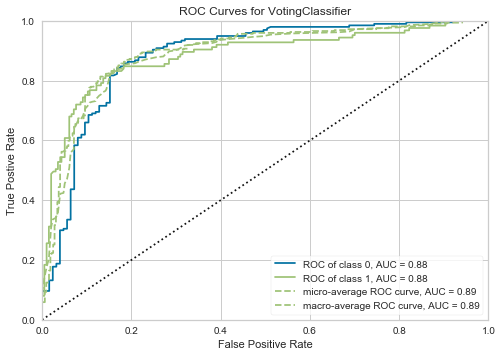

In [20]:
plot_model(blender)

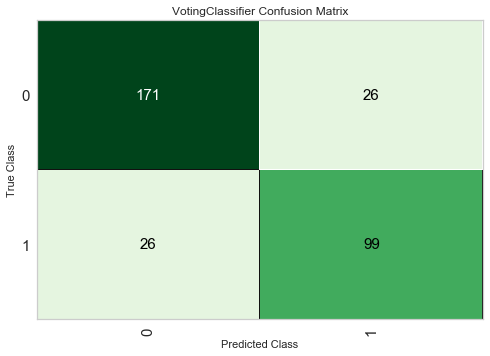

In [21]:
plot_model(blender, plot = 'confusion_matrix')

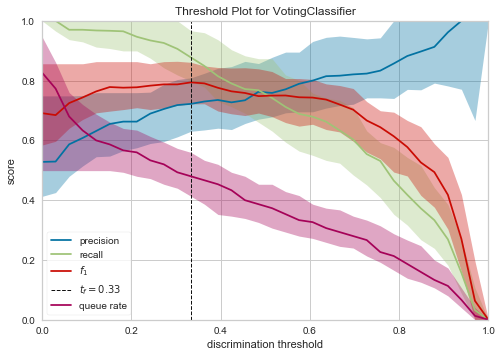

In [22]:
plot_model(blender, plot = 'threshold')

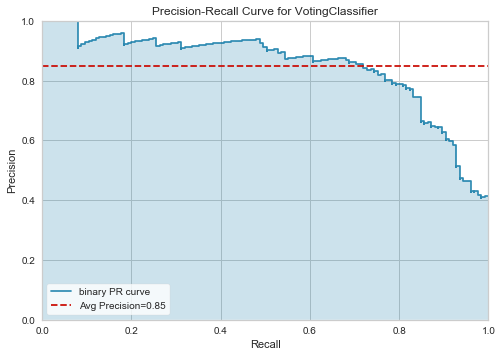

In [23]:
plot_model(blender, plot = 'pr')

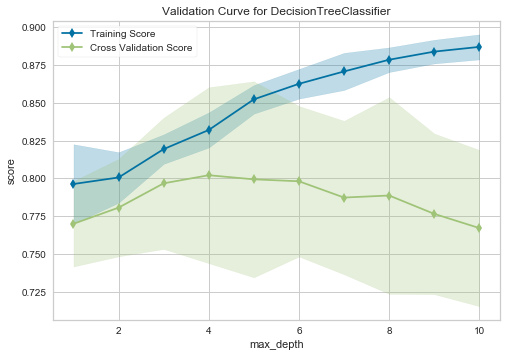

In [24]:
plot_model(tuned_dt, plot = 'vc')

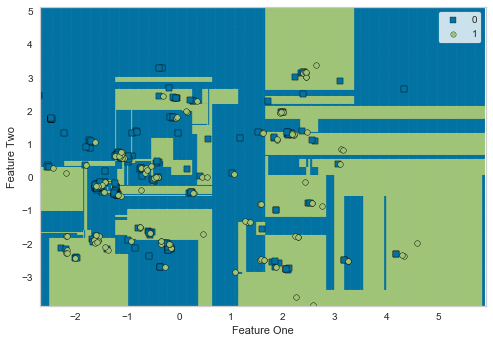

In [29]:
plot_model(dt, plot = 'boundary')

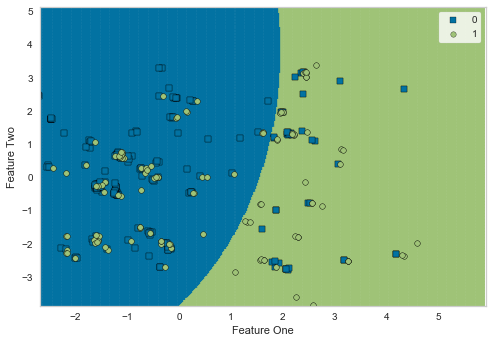

In [31]:
plot_model(tuned_nb, plot = 'boundary')

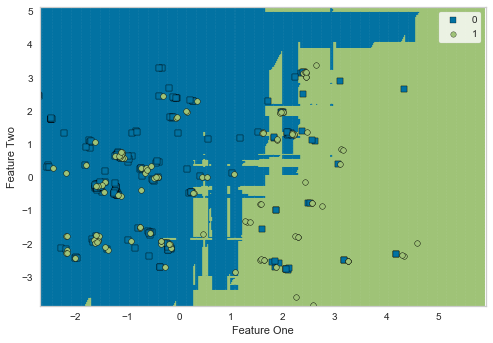

In [30]:
plot_model(blender, plot = 'boundary')

In [25]:
evaluate_model(tuned_nb) #select whatever plot you want to evaluate your model!

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 9. Interpret Model

In [26]:
xgboost = create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8133  0.9130  0.6667  0.8333  0.7407  0.5977
1       0.8267  0.9067  0.7667  0.7931  0.7797  0.6369
2       0.8400  0.9250  0.7241  0.8400  0.7778  0.6538
3       0.8800  0.9633  0.9310  0.7941  0.8571  0.7548
4       0.7200  0.8328  0.7241  0.6176  0.6667  0.4279
5       0.8267  0.9295  0.8621  0.7353  0.7937  0.6458
6       0.7333  0.8471  0.7241  0.6364  0.6774  0.4518
7       0.7067  0.8043  0.6552  0.6129  0.6333  0.3893
8       0.7703  0.9084  0.5862  0.7727  0.6667  0.4964
9       0.7838  0.8889  0.7241  0.7241  0.7241  0.5464
Mean    0.7901  0.8919  0.7364  0.7360  0.7317  0.5601
SD      0.0541  0.0466  0.0945  0.0822  0.0672  0.1113

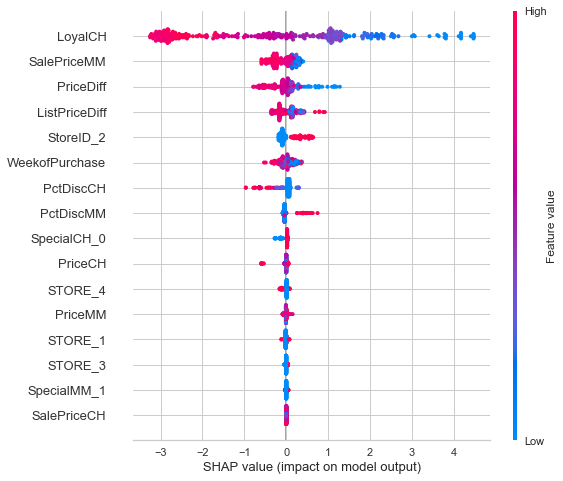

In [27]:
interpret_model(xgboost)

#if loyalCH value is higher in the dataset, chances of buying MM is lower

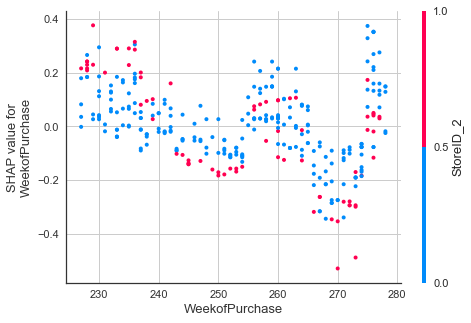

In [28]:
interpret_model(xgboost, plot = 'correlation')

In [29]:
interpret_model(xgboost, plot = 'reason', observation=1)

In [30]:
interpret_model(xgboost, plot = 'reason')

# Learning Resources:

- PyCaret Classification Module : https://www.pycaret.org/classification
- Binary Classification Tutorial (Level Beginner) : https://pycaret.org/clf101/
- Binary Classification Tutorial (Level Intermediate) : https://pycaret.org/clf102/
- Kaggle Titanic Predictions (Video Tutorial) : https://www.youtube.com/watch?v=nqMM6rngNCA